In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


In [2]:
data_train = pd.read_csv('data/emnist-byclass-train.csv')
data_test = pd.read_csv('data/emnist-byclass-test.csv')
data_train.head()

,35,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.466,0.467,0.468,0.469,0.470,0.471,0.472,0.473,0.474,0.475
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_train = data_train.iloc[:,1:]
y_train = data_train.iloc[:,0]

X_test = data_test.iloc[:,1:]
y_test = data_test.iloc[:,0]


print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(697931, 784) (697931,) (116322, 784) (116322,)


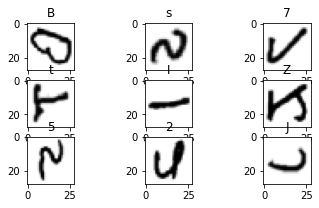

In [4]:
X_train = X_train.to_numpy()

for i in range(100, 109):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i].reshape(28,28), cmap='gray_r')
    plt.title(chr(mapp[y_train[i]]))

In [5]:
X_train_scaled = X_train / 255.0
X_train_scaled = X_train_scaled.astype('float32')
X_train_scaled,val_scaled,y_train,val_target = train_test_split(X_train_scaled,y_train,train_size=0.2, random_state=42)

In [6]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu',name='hidden'))
model.add(keras.layers.Dense(10,activation='softmax',name='output'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.optimizers import gradient_descent_v2 

learning_rate = 0.001
momentum = 0.9
sgd = gradient_descent_v2.SGD(learning_rate=learning_rate, momentum=momentum,  nesterov=False)
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics='accuracy')

In [8]:
X_train_scaled = X_train_scaled.reshape(-1,28,28)
val_scaled = val_scaled.reshape(-1,28,28)

history = model.fit(X_train_scaled,y_train, batch_size = 512,epochs=10,validation_data=(val_scaled,val_target))

Epoch 1/10
273/273 [==============================] - 4s 10ms/step - loss: nan - accuracy: 0.0489 - val_loss: nan - val_accuracy: 0.0497
Epoch 2/10
273/273 [==============================] - 2s 8ms/step - loss: nan - accuracy: 0.0490 - val_loss: nan - val_accuracy: 0.0497
Epoch 3/10
273/273 [==============================] - 2s 8ms/step - loss: nan - accuracy: 0.0490 - val_loss: nan - val_accuracy: 0.0497
Epoch 4/10
273/273 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.0490 - val_loss: nan - val_accuracy: 0.0497
Epoch 5/10
273/273 [==============================] - 2s 8ms/step - loss: nan - accuracy: 0.0490 - val_loss: nan - val_accuracy: 0.0497
Epoch 6/10
273/273 [==============================] - 2s 8ms/step - loss: nan - accuracy: 0.0490 - val_loss: nan - val_accuracy: 0.0497
Epoch 7/10
273/273 [==============================] - 2s 8ms/step - loss: nan - accuracy: 0.0490 - val_loss: nan - val_accuracy: 0.0497
Epoch 8/10
273/273 [===========================

In [63]:
print(X_train_scaled.shape,y_train.shape)

(27917, 28, 28) (27917,)
